# Read in Census and SD data
# Build dataframe of scaled features and scaled labels (i.e., median number of days businesses have been open in each tract)
## Add in some dummy variables for simplified NAICS code
## Add in some interaction terms

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
# define extra bit for filenames for codes w/ # businesses >3000 (equivalently >2100)
extras = ['54','81','45','62','56','44','72','53']
# add codes w/ # businesses <2100 & >500
#extras = [extras, ]'42','23','48','61','71','52','51','33']
# add codes w/ # businesses <500 & >50
#extras = [extras, '32','31','49','55','11']
# add codes w/ # businesses <50
#extras = [extras, '22','92','21']

# pick which code to look at
i = 7
extra = '_'+extras[i]

## Labels

In [4]:
# read in labels (i.e., business info)
bus = pd.read_csv('data_final/sd_active_businesses_cleaned.csv')
print len(bus)
print bus[:5]

# use only current business code
bus = bus[bus.naics_code_simple==float(extras[i])]
# drop tract 9902 (mostly SD Harbor, not much land) is always best tract, w/ only 3 quite old businesses (10-30 yr)
bus = bus[bus.census_tract != 9902]

print len(bus)
bus[:5]

56710
   account_key            doing_bus_as_name  days_since_creation  naics_code  \
0   2016008533          ARCHITECT ATHLETICS                   61       42199   
1   2016008531        SILVER LINING STAGERS                   61       54149   
2   2016008529                  TAMKEEN INC                   61       42299   
3   2016008525  REBECCA EICHTEN ART  DESIGN                   61       45311   
4   2016008524  COLD STONE CREAMERY   20837                   61       72221   

   naics_code_simple  census_tract  
0                 42          3212  
1                 54          8335  
2                 42          8511  
3                 45           900  
4                 72          7905  
3016


,account_key,doing_bus_as_name,days_since_creation,naics_code,naics_code_simple,census_tract
14,2016008503,U-STOR-IT 805 LLC,61,53113,53,3404
44,2016008433,STEVE RADA,62,53139,53,8511
48,2016008424,S K INNOVATIONS,62,5313,53,5200
99,2016008290,CONSTRUCTION FENCE RENTAL INC,68,532,53,6500
172,2016008104,SAFI CAR RENTAL INC DBA SAFI MOTOR,71,53211,53,9603


In [5]:
# get median days since creation for each tract
tracts_age = bus.groupby('census_tract').median().days_since_creation
tracts = tracts_age.index
median_days_open = tracts_age.values
print tracts
print median_days_open[0:10]
print len(tracts)

Int64Index([  100,   201,   202,   300,   400,   500,   600,   700,   800,
              900,
            ...
            17046, 17047, 17051, 17052, 17055, 17056, 17403, 21400, 21500,
            21800],
           dtype='int64', name=u'census_tract', length=249)
[ 1953.   3057.   3078.   3592.   1981.   1247.   3312.    993.5  2526.5
   860.5]
249


0.690410958904
23.3178082192
6.44326346482
5.77397260274
3.91775022123


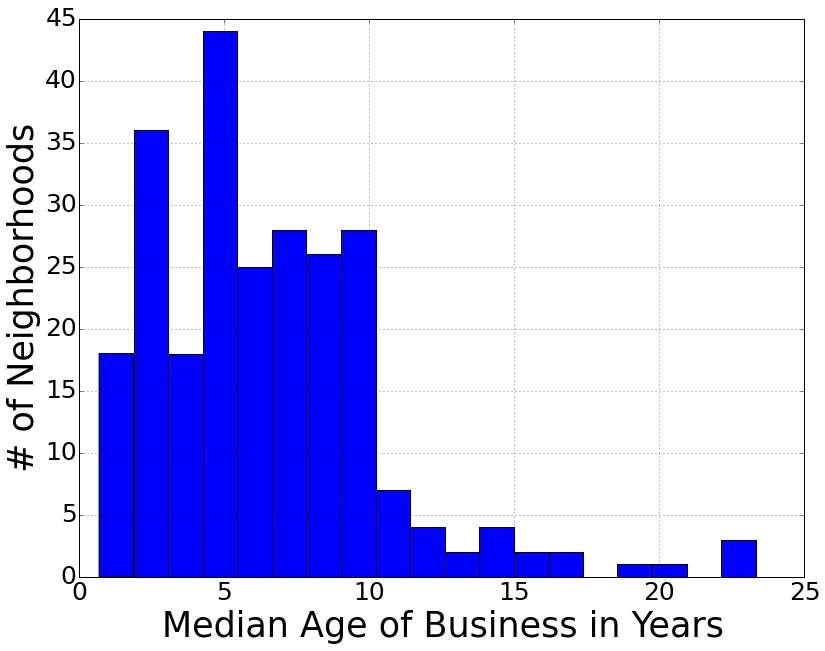

In [162]:
# plot histogram of median days since creation
plt.figure(figsize=(13, 10))
(tracts_age/365).hist(bins=19)
plt.xlabel('Median Age of Business in Years',fontsize=35)
plt.ylabel('# of Neighborhoods',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)

# print some stats of ages
print min(tracts_age/365)
print max(tracts_age/365)
#print min(median_days_open/365)
#print max(median_days_open/365)
print np.mean(tracts_age/365)
print np.median(tracts_age/365)
print np.std(tracts_age/365)

[ 0.20595714  0.3396295   0.34217218  0.40440731  0.20934738  0.12047463
  0.3705049   0.08978085  0.27539654  0.0736772 ]
1.0
0.0
0.254242785405
0.224664002906
0.173141885307


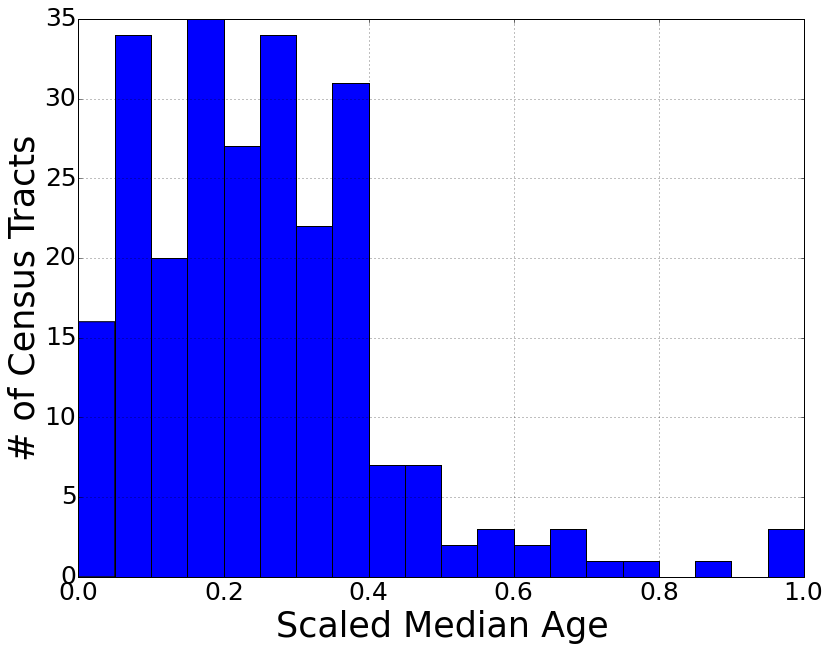

In [163]:
# scale labels to 0-1
median_days_open_scaled = (median_days_open-min(median_days_open)) / (max(median_days_open)-min(median_days_open))
print median_days_open_scaled[:10]
print max(median_days_open_scaled)
print min(median_days_open_scaled)

# plot new histogram
plt.figure(figsize=(13, 10))
plt.hist(median_days_open_scaled,bins=20)
plt.xlabel('Scaled Median Age',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.grid()

# print some stats of scaled ages
print np.mean(median_days_open_scaled)
print np.median(median_days_open_scaled)
print np.std(median_days_open_scaled)

## Features

In [164]:
# save total # of businesses in each tract
n_bus_all = bus.groupby('census_tract').count().account_key
print n_bus_all[:10]
print sum(n_bus_all)

census_tract
100    11
201     9
202     9
300    23
400    23
500     8
600     9
700    18
800     6
900    10
Name: account_key, dtype: int64
3016


In [165]:
print len(tracts)
print len(median_days_open_scaled)
print len(n_bus_all)

249
249
249


In [166]:
# combine feaures from business info into a dataframe
bus_features = pd.DataFrame({'bus_age': median_days_open_scaled, 'n_business': n_bus_all}, index=tracts)
bus_features[:5]

,bus_age,n_business
census_tract,,
100,0.205957,11
201,0.339629,9
202,0.342172,9
300,0.404407,23
400,0.209347,23


In [167]:
# read in other features
popl = pd.read_csv('data_final/sd_population_cleaned.csv',index_col=0)
fin = pd.read_csv('data_final/sd_housing_employment_income_cleaned.csv',index_col=0)
bike = pd.read_csv('data_final/walk_transit_bike_cleaned.csv',index_col=0)
parking_meters = pd.read_csv('data_final/sd_parking_meters_cleaned.csv',index_col=0)

# choose which features to use (per census tract)
    # n_business (total number of businesses)
    # population (population)
    # population_percent_male
    # population_percent_female
    # age_med (median age)
    # age_med_male (median male age)
    # age_med_female (median female age)
    # minor_percent (percenage under 18)
    # adult_percent (percentage over 18)
    # homes (number of homes)
    # homes_percent_mortgage (percentage of homes owne w/ mortgage)
    # homes_percent_clear (percentage of homes owned free & clear)
    # homes_percent_rent (percentage of homes rented)
    # employment_percent (employment percentage)
    # income_med (median income)
    # income_med_owner (median income for owned homes)
    # income_med_renter (median income for rented homes)
    # cost_med (median housing cost)
    # cost_med_owner (median cost for owned homes)
    # cost_med_renter (median cost for rented homes)
    # walk_score
    # transit_score
    # bike_score
    # total_amount (parking meters)

In [168]:
popl[:5]

,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent
census_tract,,,,,,,,
100,3029,0.501155,0.498845,50.3,49.8,50.8,0.181248,0.818752
201,1801,0.469184,0.530816,46.5,45.5,48.1,0.131038,0.868962
202,4208,0.506416,0.493584,39.6,40.0,38.8,0.115589,0.884411
300,4732,0.519865,0.480135,38.8,40.9,35.8,0.050297,0.949703
400,3669,0.549741,0.450259,35.5,38.2,32.7,0.047633,0.952367


In [169]:
bike[:10]

,walk_score,transit_score,bike_score
census_tract,,,
1900,72,46,50
9703,38,27,30
9602,38,27,30
8503,40,29,37
8501,40,29,37
9104,46,31,39
9103,46,31,39
9102,46,31,39
9101,46,31,39


4928.84235669
4629.0
2584.1009153


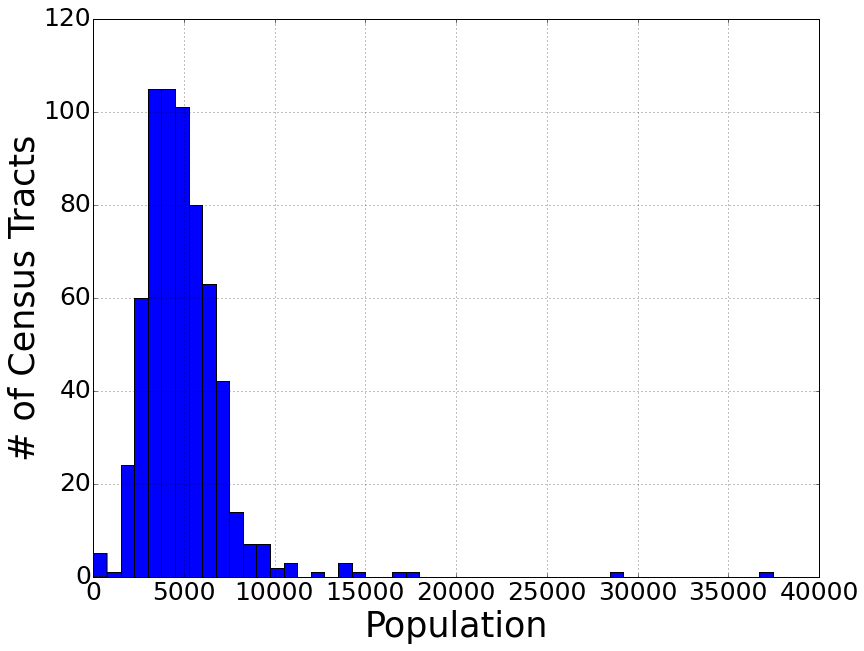

In [170]:
# plot histogram of population per census tract
plt.figure(figsize=(13, 10))
popl.population.hist(bins=50)
plt.xlabel('Population',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)
print np.mean(popl.population)
print np.median(popl.population)
print np.std(popl.population)

In [171]:
fin[:5]

,homes,homes_percent_mortgage,homes_percent_clear,homes_percent_rent,employment_percent,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter
census_tract,,,,,,,,,,,
100,1397,58.9,23.1,18.0,54.6,106406,115066,27813,1895,1923,1839
201,1047,34.1,11.1,54.8,69.2,97976,157500,42891,1338,2243,974
202,2413,32.7,9.5,57.8,75.0,75019,96000,60116,1559,2026,1445
300,3136,21.5,6.6,71.9,71.2,61679,113047,51125,1394,2310,1282
400,2288,12.2,3.4,84.4,75.4,68488,79911,67693,1299,1870,1255


In [172]:
# join business info, population info, financial info, and parking meter info
features = bus_features.join(popl).join(fin).join(bike).join(parking_meters).fillna(0)
print features.shape
features[:10]

(249, 25)


,bus_age,n_business,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
census_tract,,,,,,,,,,,,,,,,,,,,,
100,0.205957,11,3029,0.501155,0.498845,50.3,49.8,50.8,0.181248,0.818752,...,106406,115066,27813,1895,1923,1839,68.0,48.0,49.0,0.0
201,0.339629,9,1801,0.469184,0.530816,46.5,45.5,48.1,0.131038,0.868962,...,97976,157500,42891,1338,2243,974,68.0,48.0,49.0,4161773.0
202,0.342172,9,4208,0.506416,0.493584,39.6,40.0,38.8,0.115589,0.884411,...,75019,96000,60116,1559,2026,1445,60.0,50.0,42.0,11290108.0
300,0.404407,23,4732,0.519865,0.480135,38.8,40.9,35.8,0.050297,0.949703,...,61679,113047,51125,1394,2310,1282,81.0,54.0,58.0,68427664.0
400,0.209347,23,3669,0.549741,0.450259,35.5,38.2,32.7,0.047633,0.952367,...,68488,79911,67693,1299,1870,1255,81.0,54.0,58.0,44826639.0
500,0.120475,8,2722,0.497796,0.502204,39.8,40.6,38.5,0.077631,0.922369,...,54908,84271,50074,1224,1819,1145,79.0,54.0,67.0,2167540.0
600,0.370505,9,3108,0.529923,0.470077,38.6,40.1,36.7,0.059193,0.940807,...,55915,80417,53162,1216,1587,1181,79.0,54.0,67.0,1183230.0
700,0.089781,18,3754,0.535162,0.464838,38.2,40.0,36.0,0.053291,0.946709,...,68977,116372,61905,1347,2417,1241,81.0,54.0,58.0,11955695.0
800,0.275397,6,4280,0.528505,0.471495,36.3,38.0,34.8,0.109813,0.890187,...,45169,92321,40757,1093,1808,1011,0.0,0.0,0.0,1451274.0


In [173]:
# drop tract 3800 (mostly Naval Base SD) is always worst tract, w/ 11 relatively young businesses (typically ~3 yr)
#features = features[features.census_tract != 3800]
features[-80:]

,bus_age,n_business,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
census_tract,,,,,,,,,,,,,,,,,,,,,
8512,0.469730,4,4193,0.493680,0.506320,45.4,43.6,46.9,0.189408,0.810592,...,83750,83673,95417,1659,1525,2000,35.0,35.0,42.0,0.0
8513,0.335392,3,2691,0.467484,0.532516,44.4,43.4,45.2,0.174285,0.825715,...,96570,100260,69306,2014,2029,1977,35.0,35.0,42.0,0.0
8600,0.585785,6,6864,0.506410,0.493590,30.9,29.8,32.3,0.275721,0.724279,...,48062,60833,36458,1249,1229,1255,48.0,45.0,50.0,0.0
8701,0.058482,3,3361,0.495091,0.504909,29.8,28.9,30.3,0.317320,0.682680,...,59737,75469,54625,1770,1836,1586,48.0,45.0,50.0,0.0
8702,0.284054,13,5206,0.484441,0.515559,31.5,30.5,32.9,0.186793,0.813207,...,66593,90431,61750,1679,2048,1610,39.0,41.0,39.0,0.0
8800,0.480506,6,6188,0.501616,0.498384,34.3,32.8,35.4,0.252753,0.747247,...,40719,69491,26708,1266,1728,1204,48.0,45.0,50.0,0.0
8901,0.096743,5,4805,0.491988,0.508012,34.7,34.8,34.7,0.131793,0.868207,...,60813,70708,51289,1540,1420,1595,48.0,45.0,50.0,0.0
8902,0.497336,20,2221,0.506979,0.493021,37.8,36.6,39.5,0.061905,0.938095,...,57500,75588,55469,1682,1546,1764,39.0,53.0,55.0,0.0
9000,0.213343,3,3861,0.479409,0.520591,32.1,31.2,33.1,0.239203,0.760797,...,46061,83894,39514,1261,1263,1261,48.0,45.0,50.0,0.0


In [174]:
# get min/max of each column
min_cols = np.min(features,axis=0)
max_cols = np.max(features,axis=0)

# save min/max as dataframe
min_max_frame = pd.DataFrame({'min_vals': min_cols.values, 'max_vals': max_cols.values}, index=min_cols.index).T

# write min/max of each column to CSV
min_max_frame.to_csv('data_final/min_max_features'+extra+'.csv', index_label='min_max')
min_max_frame

,bus_age,n_business,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
max_vals,1.0,166.0,17679.0,0.707365,0.621689,74.7,73.6,75.4,0.50625,1.00000,...,172846.0,205776.0,188750.0,3688.0,4000.0,2000.0,97.0,81.0,84.0,191205635.0
min_vals,0.0,1.0,144.0,0.378311,0.292635,16.7,15.6,20.3,0.00000,0.49375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
# get mean/std of each column
mean_cols = np.mean(features,axis=0)
std_cols = np.std(features,axis=0)

# save mean/std as dataframe
mean_std_frame = pd.DataFrame({'mean_vals': mean_cols.values, 'std_vals': std_cols.values}, index=mean_cols.index).T

# write mean/std of each column to CSV
mean_std_frame.to_csv('data_final/mean_std_features'+extra+'.csv', index_label='mean_std')
mean_std_frame

,bus_age,n_business,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
mean_vals,0.254243,12.112450,4744.526104,0.502466,0.497534,35.791165,35.074699,36.473896,0.207019,0.792981,...,71257.212851,90359.329317,56912.590361,1629.369478,1871.763052,1463.425703,41.337349,30.377510,38.598394,3.015219e+06
std_vals,0.173142,19.121137,2055.865604,0.031986,0.031986,7.542788,7.346165,7.857067,0.093728,0.093728,...,31991.150898,33035.674011,27994.902593,548.890820,638.225562,373.926624,25.026385,18.837128,20.480752,1.658345e+07


In [176]:
# feature scale to min/max range
features_scaled = (features-min_cols) / (max_cols-min_cols)
print features_scaled.shape
features_scaled[:10]

(249, 25)


,bus_age,n_business,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
census_tract,,,,,,,,,,,,,,,,,,,,,
100,0.205957,0.060606,0.164528,0.373326,0.626674,0.579310,0.589655,0.553539,0.358021,0.641979,...,0.615612,0.559181,0.147354,0.513829,0.48075,0.9195,0.701031,0.592593,0.583333,0.000000
201,0.339629,0.048485,0.094497,0.276163,0.723837,0.513793,0.515517,0.504537,0.258841,0.741159,...,0.566840,0.765395,0.227237,0.362798,0.56075,0.4870,0.701031,0.592593,0.583333,0.021766
202,0.342172,0.048485,0.231765,0.389314,0.610686,0.394828,0.420690,0.335753,0.228324,0.771676,...,0.434022,0.466527,0.318495,0.422722,0.50650,0.7225,0.618557,0.617284,0.500000,0.059047
300,0.404407,0.133333,0.261648,0.430184,0.569816,0.381034,0.436207,0.281307,0.099351,0.900649,...,0.356844,0.549369,0.270861,0.377983,0.57750,0.6410,0.835052,0.666667,0.690476,0.357875
400,0.209347,0.133333,0.201027,0.520979,0.479021,0.324138,0.389655,0.225045,0.094090,0.905910,...,0.396237,0.388340,0.358638,0.352223,0.46750,0.6275,0.835052,0.666667,0.690476,0.234442
500,0.120475,0.042424,0.147020,0.363116,0.636884,0.398276,0.431034,0.330309,0.153344,0.846656,...,0.317670,0.409528,0.265293,0.331887,0.45475,0.5725,0.814433,0.666667,0.797619,0.011336
600,0.370505,0.048485,0.169033,0.460751,0.539249,0.377586,0.422414,0.297641,0.116925,0.883075,...,0.323496,0.390799,0.281653,0.329718,0.39675,0.5905,0.814433,0.666667,0.797619,0.006188
700,0.089781,0.103030,0.205874,0.476674,0.523326,0.370690,0.420690,0.284936,0.105266,0.894734,...,0.399066,0.565528,0.327974,0.365239,0.60425,0.6205,0.835052,0.666667,0.690476,0.062528
800,0.275397,0.030303,0.235871,0.456441,0.543559,0.337931,0.386207,0.263158,0.216915,0.783085,...,0.261325,0.448648,0.215931,0.296367,0.45200,0.5055,0.000000,0.000000,0.000000,0.007590


In [177]:
# write dataframe to csv
features_scaled.to_csv('data_final/features'+extra+'.csv')
#features.to_csv('data_final/features.csv')